# Drug Classification using Decision Tree

The dataset has data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and Drug y.

Now, we are going to build a model to find out which drug might be appropriate for a future patient with the same illness. 

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#importing dataset
df=pd.read_csv("G:\Data science\Datasets\drugtest.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


The features of this dataset are Age, Sex, Blood Pressure, Cholesterol and Sodium-Potassium level of the patients and the target is the drug that each patient responded to.

In [3]:
#information on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
#statistical analysis 
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [5]:
df.describe(include='object')

,Sex,BP,Cholesterol,Drug
count,200,200,200,200
unique,2,3,2,5
top,M,HIGH,HIGH,drugY
freq,104,77,103,91


In [6]:
df.Sex.value_counts(normalize=True)*100

M    52.0
F    48.0
Name: Sex, dtype: float64

In [7]:
df.Drug.value_counts(normalize=True)*100

drugY    45.5
drugX    27.0
drugA    11.5
drugC     8.0
drugB     8.0
Name: Drug, dtype: float64

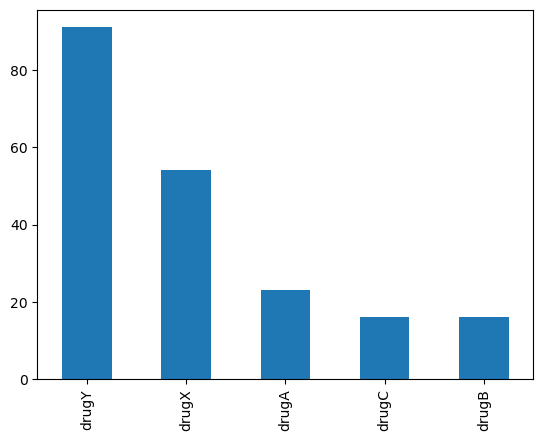

In [8]:
dcount=df.Drug.value_counts()
dcount.plot(kind='bar');

    Key Findings:
    1.Average age of the patient is 44.
    2.Average Sodium Potassium level is 16 units.
    3.Most of the patients has high BP and Cholestrol.
    4.The patients are of approximately equal in sex ratio.
    5.Most of the patients responded to Drug Y.

## Decision Tree

In [9]:
#pre-processing data
x=df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
x[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [10]:
from sklearn import preprocessing

In [11]:
sex = preprocessing.LabelEncoder().fit(['F','M'])
x[:,1] = sex.transform(x[:,1]) 
bp=preprocessing.LabelEncoder().fit(['LOW','NORMAL','HIGH'])
x[:,2]=bp.transform(x[:,2])
chol=preprocessing.LabelEncoder().fit(['NORMAL','HIGH'])
x[:,3]=chol.transform(x[:,3])
x[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [12]:
y=df["Drug"]
y[0:5]


0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [13]:
#train test split of dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=3)
print("Shape of train set :",x_train.shape,y_train.shape)
print("Shape of test set :",x_test.shape,y_test.shape)

Shape of train set : (140, 5) (140,)
Shape of test set : (60, 5) (60,)


In [14]:
#modeling
from sklearn.tree import DecisionTreeClassifier

In [15]:
drugtree=DecisionTreeClassifier(criterion='entropy',max_depth=4)
drugtree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [16]:
drugtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [17]:
#prediction
y_hat=drugtree.predict(x_test)

In [18]:
print(y_hat[0:5])
print(y_test[0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


In [20]:
#evaluation of the model
from sklearn import metrics
print("Accuracy of Decision tree : ",metrics.accuracy_score(y_test,y_hat))

Accuracy of Decision tree :  0.9833333333333333


### Test case

Lets consider a patient,A with Age=44,Sex=M,BP=High,Cholesterol=High,Na_to_K=16 and predict the suitable drug for him.

In [21]:
A=[[44,1,2,1,16]]
pred=drugtree.predict(A)

In [23]:
pred[0]

'drugY'

Our model predicts that Drug Y will be suitable for our imaginary patient A.